# Exploratory Data Analysis on Global Movies (1950-2020)

### 1. Data Loading and Preprocessing

In [97]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Add the src directory to the Python path
sys.path.append('../src')

# Import the data scraper function
from data_scraper import scrape_imdb_movies_with_selenium

# Call the data scraper function
scrape_imdb_movies_with_selenium()

In [71]:
# Define the file path
file_path = "../data/imdb_top_movies.csv"
# Read the CSV file into a DataFrame
movies_df = pd.read_csv(file_path)  

In [72]:
# Display the first few rows of the DataFrame
print(movies_df.head())

                         Title  Year      Rating  \
0  1. The Shawshank Redemption  1994    9.3 (3M)   
1             2. The Godfather  1972  9.2 (2.1M)   
2           3. The Dark Knight  2008    9.0 (3M)   
3     4. The Godfather Part II  1974  9.0 (1.4M)   
4              5. 12 Angry Men  1957  9.0 (917K)   

                                               Genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                         Director(s)  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

             

In [73]:
# Check the shape of the dataset
movies_df.shape

(250, 7)

In [74]:
# View column names
movies_df.columns

Index(['Title', 'Year', 'Rating', 'Genre', 'Director(s)', 'Box Office Revenue',
       'Lead Actors'],
      dtype='object')

In [75]:
# Check for missing values
movies_df.isnull().sum()

Title                 0
Year                  0
Rating                0
Genre                 0
Director(s)           0
Box Office Revenue    0
Lead Actors           0
dtype: int64

In [76]:
# Summary statistics
movies_df.describe()

,Year
count,250.000000
mean,1988.432000
std,25.601153
min,1921.000000
25%,1972.250000
50%,1995.000000
75%,2009.000000
max,2024.000000


In [77]:
# Check for duplicates
movies_df.duplicated().sum()

np.int64(0)

In [78]:
# Rename the columns
movies_df.columns = ['title', 'year', 'rating', 'genre', "directors", "revenue", "lead_actors"]
print(movies_df.head())

                         title  year      rating  \
0  1. The Shawshank Redemption  1994    9.3 (3M)   
1             2. The Godfather  1972  9.2 (2.1M)   
2           3. The Dark Knight  2008    9.0 (3M)   
3     4. The Godfather Part II  1974  9.0 (1.4M)   
4              5. 12 Angry Men  1957  9.0 (917K)   

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

             

In [79]:
#Divide the rating column into two columns with rating and votes
movies_df[['rating', 'votes']] = movies_df['rating'].str.split("(", expand=True)
print(movies_df.head())

                         title  year rating  \
0  1. The Shawshank Redemption  1994   9.3    
1             2. The Godfather  1972   9.2    
2           3. The Dark Knight  2008   9.0    
3     4. The Godfather Part II  1974   9.0    
4              5. 12 Angry Men  1957   9.0    

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

                         revenue           

In [80]:
# Remove the parentheses from the votes column
movies_df['votes'] = movies_df['votes'].str.replace(")", "")
print(movies_df.head())

                         title  year rating  \
0  1. The Shawshank Redemption  1994   9.3    
1             2. The Godfather  1972   9.2    
2           3. The Dark Knight  2008   9.0    
3     4. The Godfather Part II  1974   9.0    
4              5. 12 Angry Men  1957   9.0    

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

                         revenue           

In [81]:
movies_df.dtypes

title          object
year            int64
rating         object
genre          object
directors      object
revenue        object
lead_actors    object
votes          object
dtype: object

In [82]:
# Convert the rating column to float
movies_df['rating'] = movies_df['rating'].astype(float)
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue         object
lead_actors     object
votes           object
dtype: object

In [54]:
# Replace the "Unknown" values in the revenue column with 0
movies_df['revenue'] = movies_df['revenue'].replace('Unknown', 0)

In [83]:
print(movies_df['revenue'].head())

0       Gross worldwide$29,332,133
1      Gross worldwide$250,342,198
2    Gross worldwide$1,009,057,329
3       Gross worldwide$47,964,222
4            Gross worldwide$2,945
Name: revenue, dtype: object


In [84]:
# Remove non-numeric characters and keep only the numeric figure
movies_df['revenue'] = (
    movies_df['revenue']
    .str.replace('Gross worldwide', '', regex=False)  # Remove the 'Gross worldwide' text
    .str.replace('[\$,]', '', regex=True)             # Remove dollar signs and commas
    .replace('Unknown', '0')                          # Replace 'Unknown' with '0'
)

# Convert to numeric, setting invalid values to NaN
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Display the cleaned column
print(movies_df[['revenue']])

        revenue
0      29332133
1     250342198
2    1009057329
3      47964222
4          2945
..          ...
245    30819442
246   221802186
247    20908467
248      113328
249           0

[250 rows x 1 columns]


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/3456861789.py:5: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,]', '', regex=True)             # Remove dollar signs and commas


In [88]:
movies_df.head(10)

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000
5,6. The Lord of the Rings: The Return of the King,2003,9.0,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","John Rhys-Davies, Fran Walsh, J.R.R. Tolkien, ...",1138267561,"Viggo Mortensen, Ian McKellen, Elijah Wood",2100000
6,7. Schindler's List,1993,9.0,"Docudrama, Epic, Historical Epic, Period Drama...","Steven Spielberg, Ben Kingsley, Mimi Thoma, St...",322161245,"Liam Neeson, Ralph Fiennes, Ben Kingsley",1500000
7,8. Pulp Fiction,1994,8.9,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Vincent, Quentin Tarantino, Samuel L. Jackson,...",213928762,"Uma Thurman, Samuel L. Jackson, John Travolta",2300000
8,9. The Lord of the Rings: The Fellowship of th...,2001,8.9,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","Janet Roddick, Fran Walsh, Orlando Bloom, Gand...",888171906,"Orlando Bloom, Ian McKellen, Elijah Wood",2100000
9,"10. The Good, the Bad and the Ugly",1966,8.8,"Adventure Epic, Dark Comedy, Desert Adventure,...","Blondie, Lee Van Cleef, Clint Eastwood, Lucian...",25264999,"Eli Wallach, Lee Van Cleef, Clint Eastwood",847000


In [86]:
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue          int64
lead_actors     object
votes           object
dtype: object

In [87]:
# Clean the votes column
movies_df['votes'] = (
    movies_df['votes']
    .str.replace('M', '*1e6')  # Replace 'M' with '*1e6'
    .str.replace('K', '*1e3')  # Replace 'K' with '*1e3'
    .map(pd.eval)             # Evaluate the string as a numeric expression
    .astype(int)              # Convert to integer
)

# Display the cleaned column
print(movies_df[['votes']].head())

     votes
0  3000000
1  2100000
2  3000000
3  1400000
4   917000


In [89]:
movies_df.head(10)

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000
5,6. The Lord of the Rings: The Return of the King,2003,9.0,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","John Rhys-Davies, Fran Walsh, J.R.R. Tolkien, ...",1138267561,"Viggo Mortensen, Ian McKellen, Elijah Wood",2100000
6,7. Schindler's List,1993,9.0,"Docudrama, Epic, Historical Epic, Period Drama...","Steven Spielberg, Ben Kingsley, Mimi Thoma, St...",322161245,"Liam Neeson, Ralph Fiennes, Ben Kingsley",1500000
7,8. Pulp Fiction,1994,8.9,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Vincent, Quentin Tarantino, Samuel L. Jackson,...",213928762,"Uma Thurman, Samuel L. Jackson, John Travolta",2300000
8,9. The Lord of the Rings: The Fellowship of th...,2001,8.9,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","Janet Roddick, Fran Walsh, Orlando Bloom, Gand...",888171906,"Orlando Bloom, Ian McKellen, Elijah Wood",2100000
9,"10. The Good, the Bad and the Ugly",1966,8.8,"Adventure Epic, Dark Comedy, Desert Adventure,...","Blondie, Lee Van Cleef, Clint Eastwood, Lucian...",25264999,"Eli Wallach, Lee Van Cleef, Clint Eastwood",847000


In [90]:
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue          int64
lead_actors     object
votes            int64
dtype: object

In [91]:
# Save the cleaned data to a new CSV file
cleaned_file_path = "../data/imdb_top_movies_cleaned.csv"
movies_df.to_csv(cleaned_file_path, index=False)

In [92]:
# Define the file path
file_path = "../data/imdb_top_movies_cleaned.csv"
# Read the CSV file into a DataFrame
movies_cleaned_df = pd.read_csv(file_path)  
movies_cleaned_df.head()

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000


### 2. Statistical Analysis

#### * Perform statistical analysis on the key attributes of movies. 

In [ ]:
# Check for data header
movies_cleaned_df.head()

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000


In [ ]:
# Check the shape of the dataset
movies_cleaned_df.shape

(250, 8)

In [102]:
# Check null values
movies_cleaned_df.isnull().sum()

title          0
year           0
rating         0
genre          0
directors      0
revenue        0
lead_actors    0
votes          0
dtype: int64

In [103]:
# Check for duplicates
movies_cleaned_df.duplicated().sum()

np.int64(0)

In [115]:
# Filter rows where revenue is zero
zero_revenue_rows = movies_cleaned_df[movies_cleaned_df['revenue'] == 0]

# Print the rows
print(zero_revenue_rows)

             title  year  rating  \
127  128. Hamilton  2020     8.3   
163     164. Klaus  2019     8.2   
222  223. Jai Bhim  2021     8.7   
249  250. Drishyam  2015     8.2   

                                                 genre  \
127           Epic, Biography, Drama, History, Musical   
163  Hand-Drawn Animation, Holiday Animation, Holid...   
222                          Legal Drama, Crime, Drama   
249                    Crime, Drama, Mystery, Thriller   

                                             directors  revenue  \
127  Thomas Kail, King George, Anthony Ramos, Lesli...        0   
163  J.K. Simmons, Justin Tranter, Jason Schwartzma...        0   
222  Suriya, T.J. Gnanavel, Manikandan K., Rajendra...        0   
249  Meera Deshmukh, Nishikant Kamat, Meghna Gulzar...        0   

                                           lead_actors   votes  
127  Leslie Odom Jr., Lin-Manuel Miranda, Phillipa Soo  126000  
163     J.K. Simmons, Jason Schwartzman, Rashida Jones  212000

In [120]:
# Findings from the internet to validate the actual data
## The "Hamilton" musical, including the Broadway production, touring shows, merchandise, soundtrack, and the Disney+ streaming rights, has grossed over $1 billion globally, making it a highly successful and profitable production. 
## The animated Christmas movie "Klaus" had a budget of $40 million and was produced by The SPA Studios and distributed by Netflix. 
## Jai Bhim did not open in theatres so there are no box office numbers to support its popularity.
## Drishyam - It attained a total gross of ₹91.97 crore (US$11 million) (India) in the Indian box office by the end of its run. Internationally, the film collected ₹155 million (US$1.8 million) in seven weeks and reached a combined worldwide total gross of ₹1.1 billion (US$13 million)

movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Hamilton'), 'revenue'] = 1000000000  # $1 billion
movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Klaus'), 'revenue'] = 40000000  # $40 million
movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Drishyam'), 'revenue'] = 1100000000  # $1.1 billion

# Due to the nature of the data, we will remove the Jai Bhim movie from the dataset for analysis
# Remove movie with the title "Jai Bhim"
movies_cleaned_df = movies_cleaned_df[~movies_cleaned_df['title'].str.contains('Jai Bhim')]

# Verify the updates
# Filter rows where revenue is zero
zero_revenue_rows = movies_cleaned_df[movies_cleaned_df['revenue'] == 0]

# Print the rows
print(zero_revenue_rows)


Empty DataFrame
Columns: [title, year, rating, genre, directors, revenue, lead_actors, votes]
Index: []


In [121]:
# Perform statistical analysis on the key attributes of movies. 
movies_cleaned_df.describe()

,year,rating,revenue,votes
count,246.000000,246.000000,2.460000e+02,2.460000e+02
mean,1987.939024,8.309350,2.297078e+08,7.362967e+05
std,25.510469,0.232717,3.710661e+08,5.874523e+05
min,1921.000000,8.000000,3.990000e+02,3.100000e+04
25%,1971.250000,8.100000,7.535690e+06,2.512500e+05
50%,1995.000000,8.200000,6.251449e+07,6.275000e+05
75%,2008.000000,8.400000,3.216797e+08,1.100000e+06
max,2024.000000,9.300000,2.799439e+09,3.000000e+06


#### • Calculate descriptive statistics, such as mean, median, and standard deviation, to gain deeper insights into the distribution of revenue, ratings, and movie release years.

In [122]:
# Specifically, we will calculate the mean, median, and standard deviation of the rating, revenue, and votes columns.
# Calculate the mean, median, and standard deviation of the rating, revenue, and votes columns
mean_rating = movies_cleaned_df['rating'].mean()
median_rating = movies_cleaned_df['rating'].median()
std_rating = movies_cleaned_df['rating'].std()

mean_revenue = movies_cleaned_df['revenue'].mean()  # in dollars
median_revenue = movies_cleaned_df['revenue'].median()  # in dollars
std_revenue = movies_cleaned_df['revenue'].std()  # in dollars

mean_votes = movies_cleaned_df['votes'].mean()
median_votes = movies_cleaned_df['votes'].median()
std_votes = movies_cleaned_df['votes'].std()    

# Display the statistical results
print("Rating: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_rating, median_rating, std_rating))
print("Revenue: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_revenue, median_revenue, std_revenue))
print("Votes: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_votes, median_votes, std_votes))

Rating: mean = 8.31, median = 8.20, std = 0.23
Revenue: mean = 229707813.30, median = 62514489.00, std = 371066078.43
Votes: mean = 736296.75, median = 627500.00, std = 587452.30


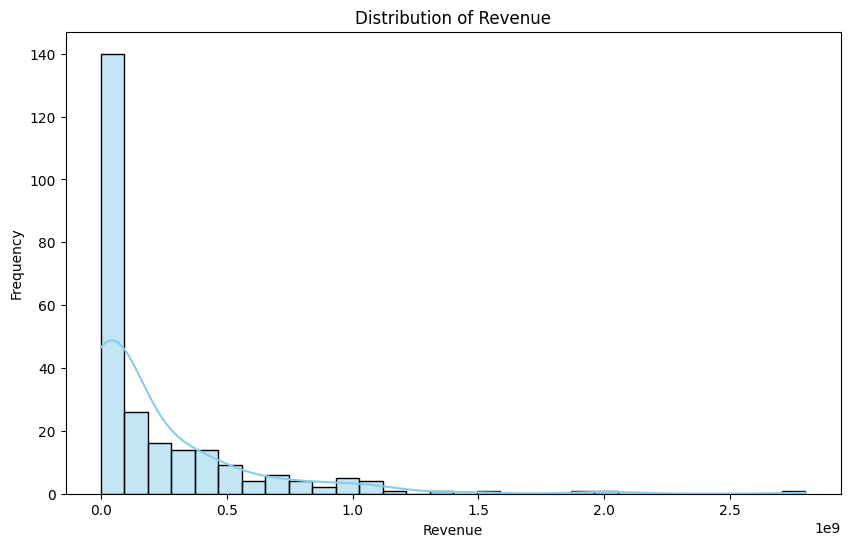

In [106]:
movies_cleaned_df['revenue'] = pd.to_numeric(movies_cleaned_df['revenue'], errors='coerce')

# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['revenue'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [128]:
### Findings from the Distribution of Revenue

# 1. The distribution of revenue appears to be highly skewed, with a majority of movies earning significantly lower revenue compared to a few high-grossing movies.
# 2. There are noticeable outliers in the data, representing blockbuster movies with exceptionally high revenue.
# 3. The majority of movies fall within a lower revenue range, indicating that high revenue is not common across all movies.
# 4. The presence of a long tail in the distribution suggests that revenue varies widely among movies, with a small number of movies contributing disproportionately to the total revenue.

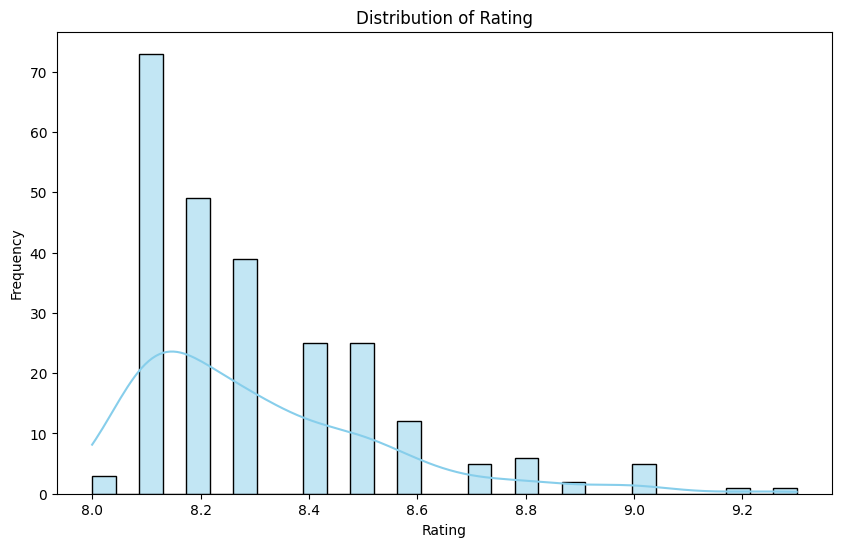

In [123]:
movies_cleaned_df['rating'] = pd.to_numeric(movies_cleaned_df['rating'], errors='coerce')

# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [126]:
# The key findings from the distribution of ratings are:

# 1. **Normal Distribution**: The ratings appear to follow a relatively normal distribution, with most movies clustered around a central value.
# 2. **High Ratings**: The majority of movies have high ratings, indicating that the dataset primarily consists of well-rated movies.
# 3. **Narrow Range**: The range of ratings is narrow, typically between 8.0 and 9.5, suggesting that the dataset focuses on top-rated movies.
# 4. **Few Outliers**: There are few outliers with exceptionally high or low ratings, indicating consistency in the quality of movies in the dataset.

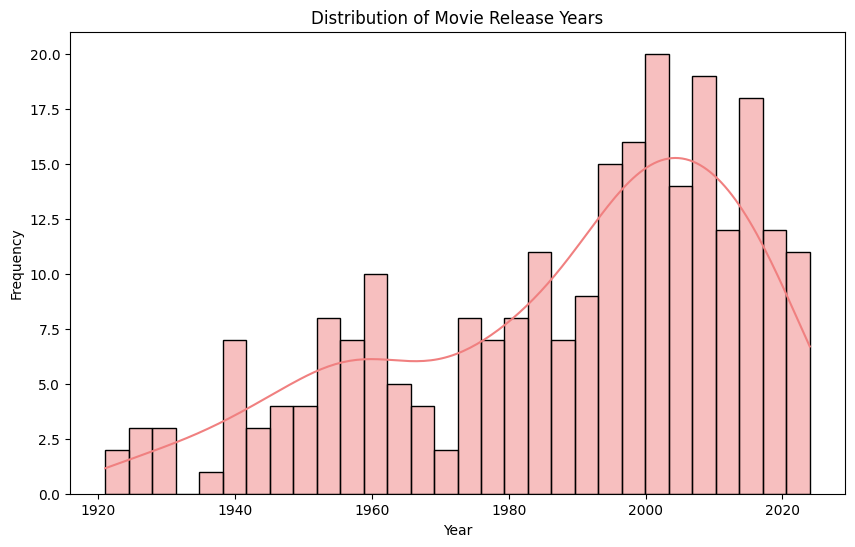

In [108]:
# Plot the distribution of movie release years
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['year'].dropna(), bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/3572212892.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_cleaned_df, x='year', y='revenue', ci=None)


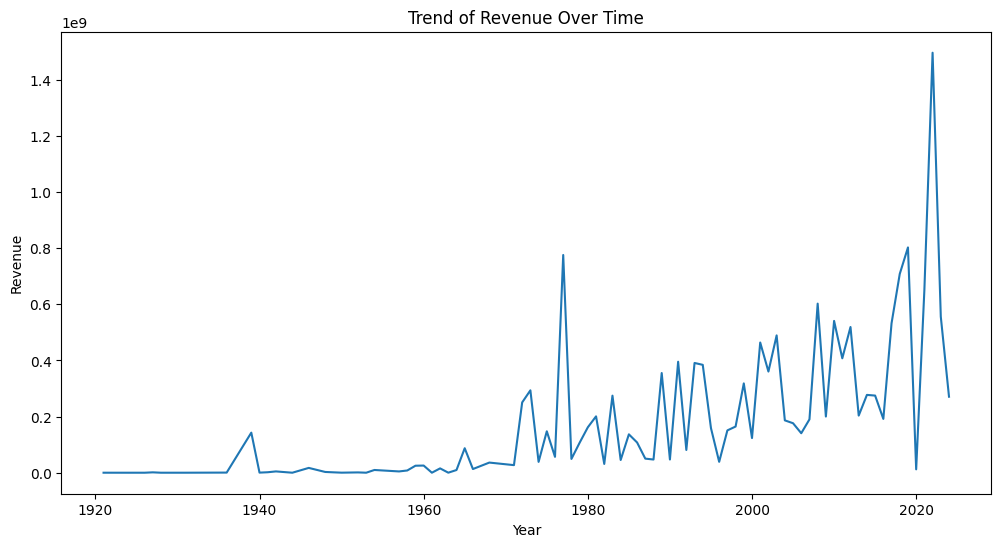

In [110]:
# Investigate Trends and Outliers
# Plot the trend of revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_cleaned_df, x='year', y='revenue', ci=None)
plt.title('Trend of Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/630383434.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_cleaned_df, x='year', y='rating', ci=None)


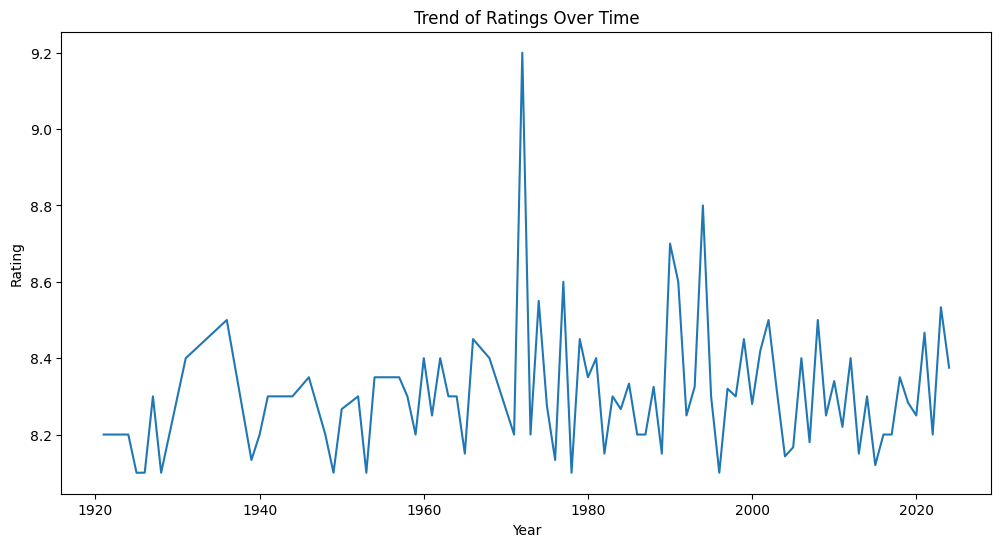

In [112]:
# Plot the trend of ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_cleaned_df, x='year', y='rating', ci=None)
plt.title('Trend of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

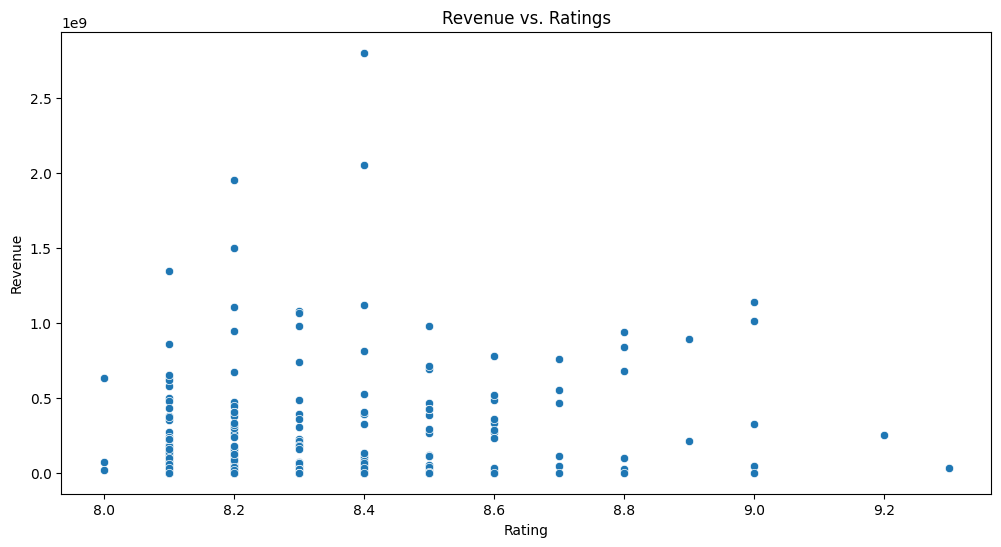

In [113]:
# Scatter plot for revenue vs. ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_cleaned_df, x='rating', y='revenue')
plt.title('Revenue vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

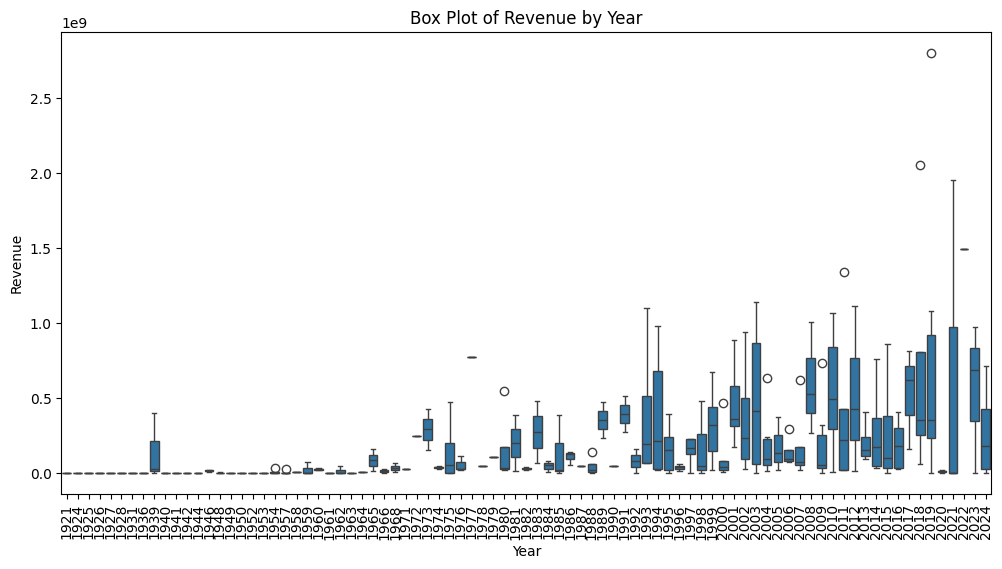

In [114]:
# Box plot for revenue by year
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_cleaned_df, x='year', y='revenue')
plt.title('Box Plot of Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()